Cleaning the File

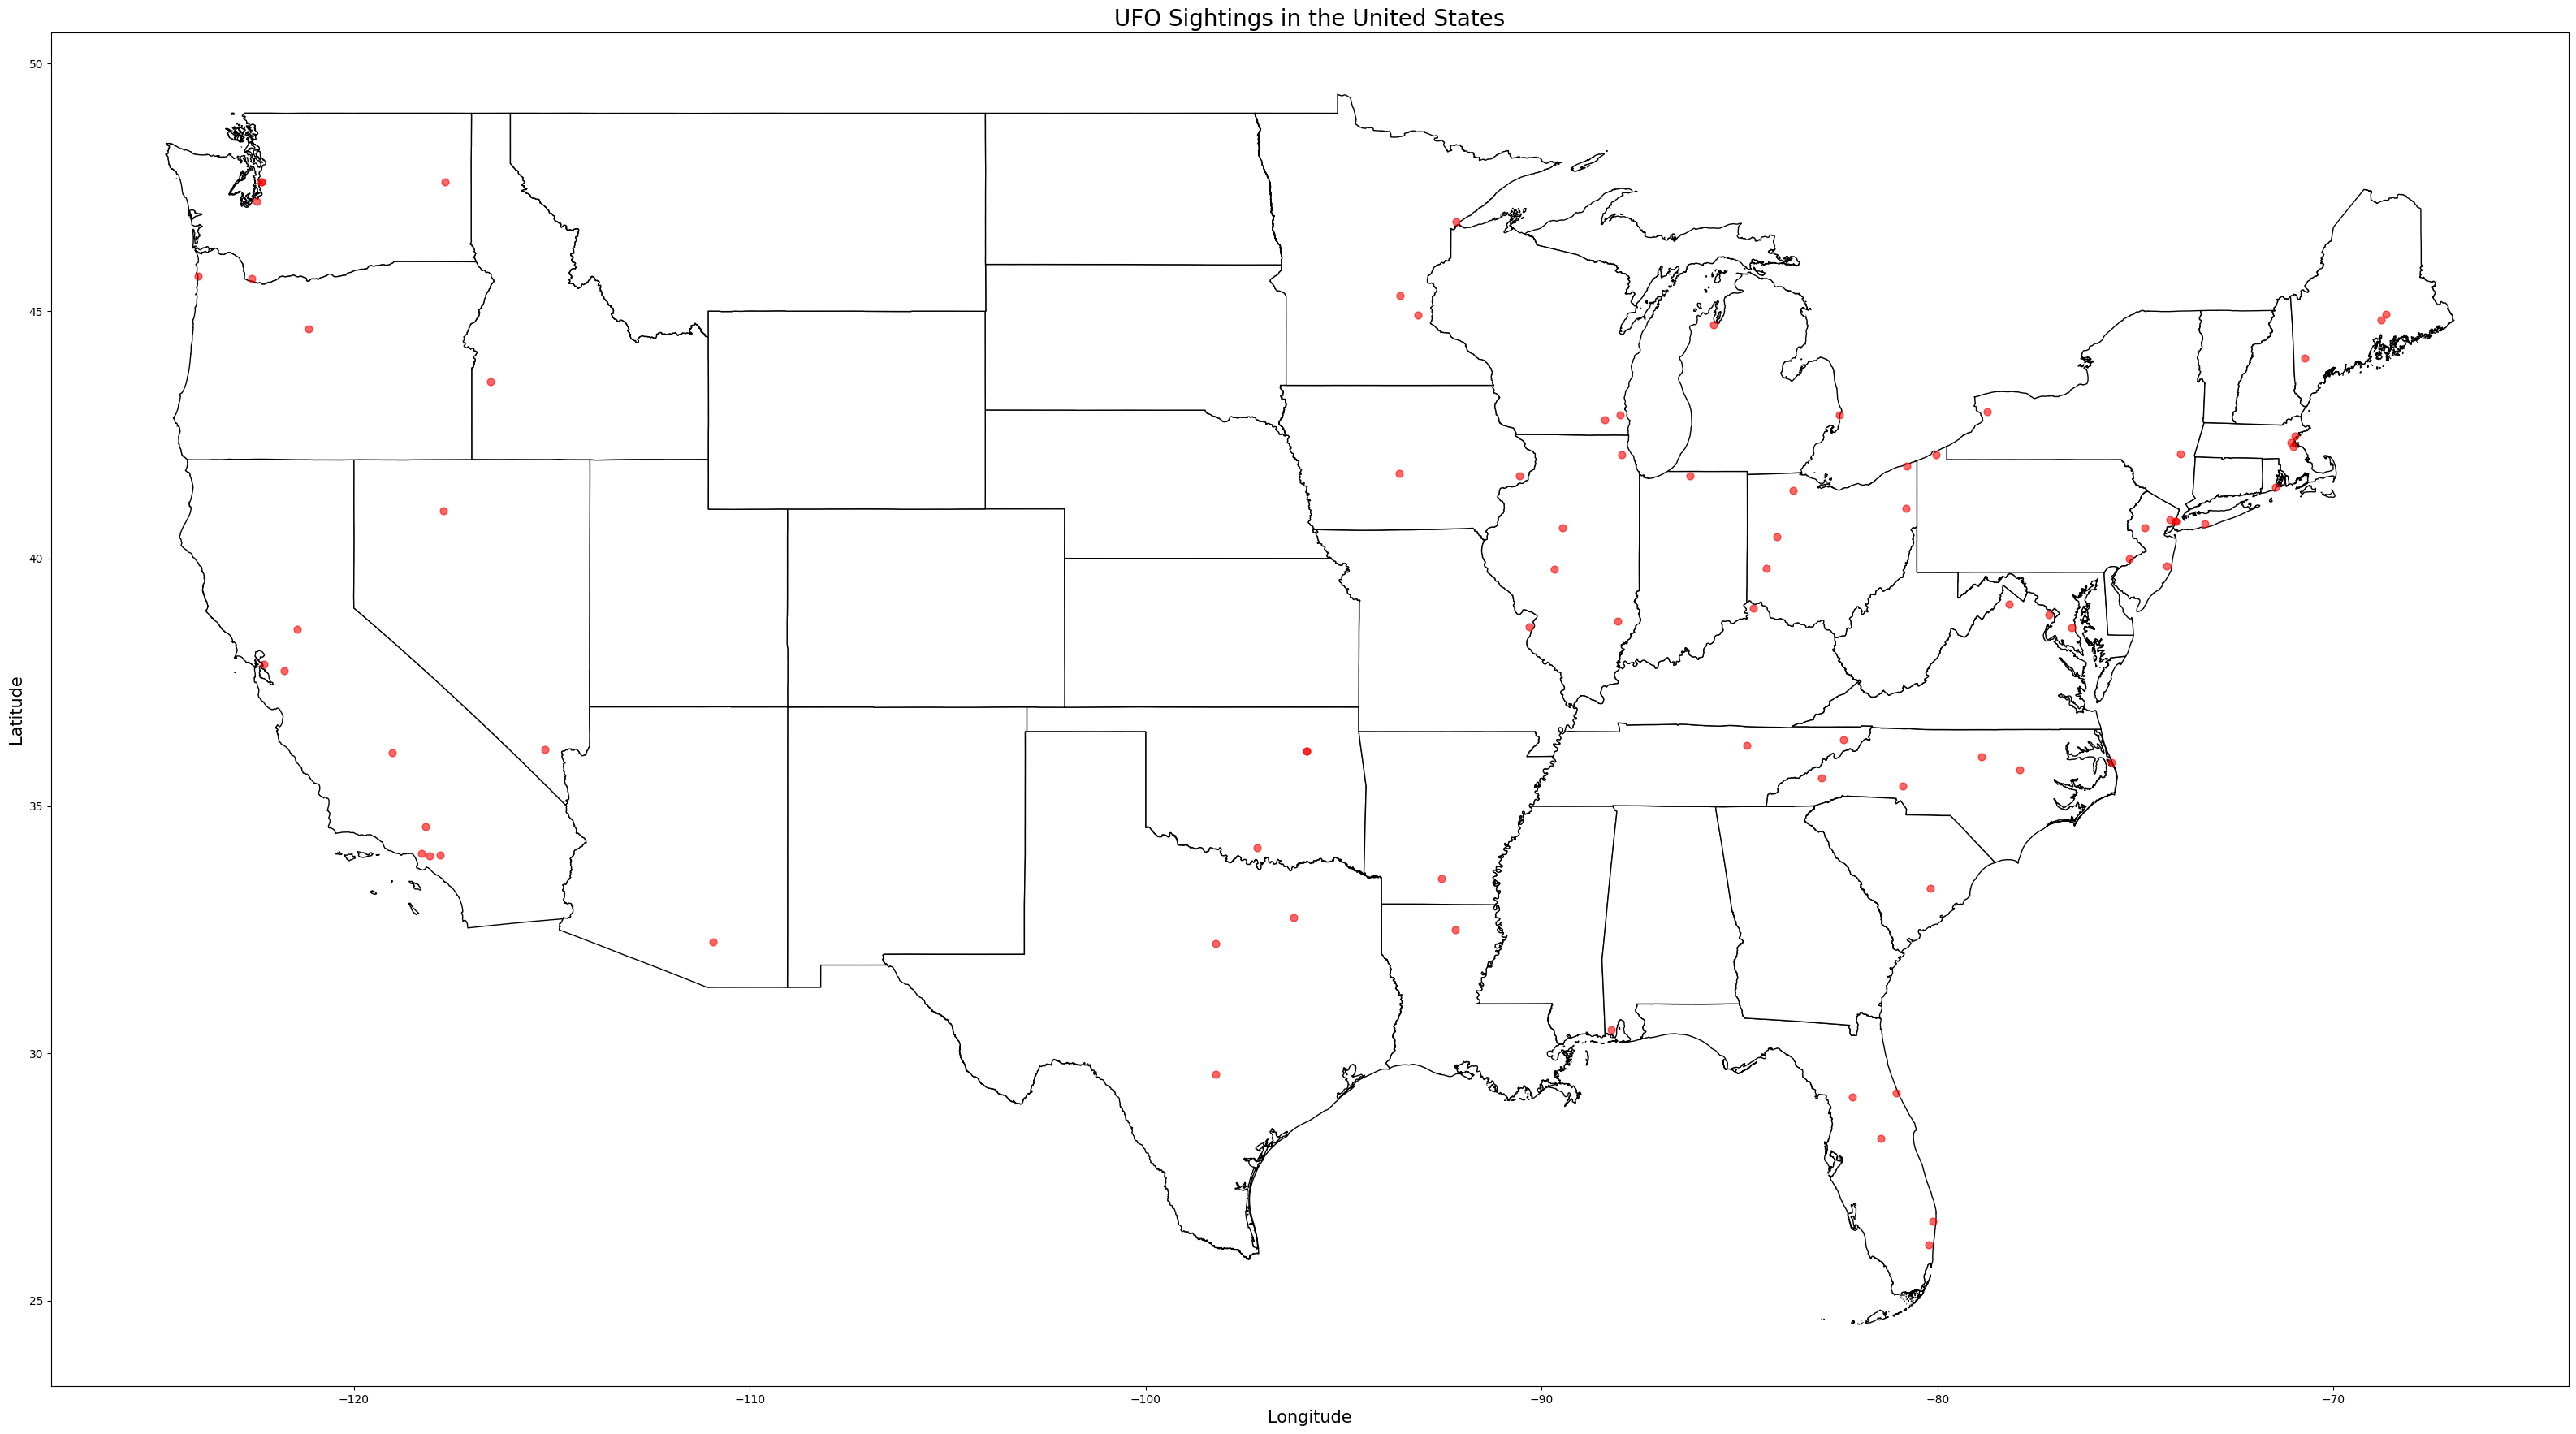

In [55]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load data
ballons_path = "test_weather.csv"
shape_path = "Shapefiles/cb_2018_us_state_500k.shp"


df = pd.read_csv(ballons_path)
shape = gpd.read_file(shape_path)


# exclude the values that we would not like to display
shape = shape[~shape['STUSPS'].isin(['HI', 'AK', 'PR', 'AS', 'VI', 'MP', 'GU'])]

# Create GeoDataFrame from UFO sightings data
geometry = [Point(xy) for xy in zip(df['city_longitude'], df['city_latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Ensure CRS (Coordinate Reference System) is set correctly
geo_df.set_crs(epsg=4326, inplace=True)
shape.to_crs(geo_df.crs, inplace=True)  # Reproject shape to match geo_df CRS

# Perform spatial overlay to keep only points within US borders
points_within_us = gpd.overlay(geo_df, shape, how='intersection')

# Plot the data
fig, ax = plt.subplots(figsize=(40, 40))
shape.plot(ax=ax, color='white', edgecolor='black')
points_within_us.plot(ax=ax, color='red', markersize=40, alpha=0.6)

# Add titles and labels
ax.set_title('Weather Balloons', fontsize=20)
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)

# Show plot
plt.show()



C:\Users\emofr\AppData\Local\Temp\ipykernel_2336\2349679991.py:33: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points_within_us['geometry'] = points_within_us.buffer(buffer_distance)


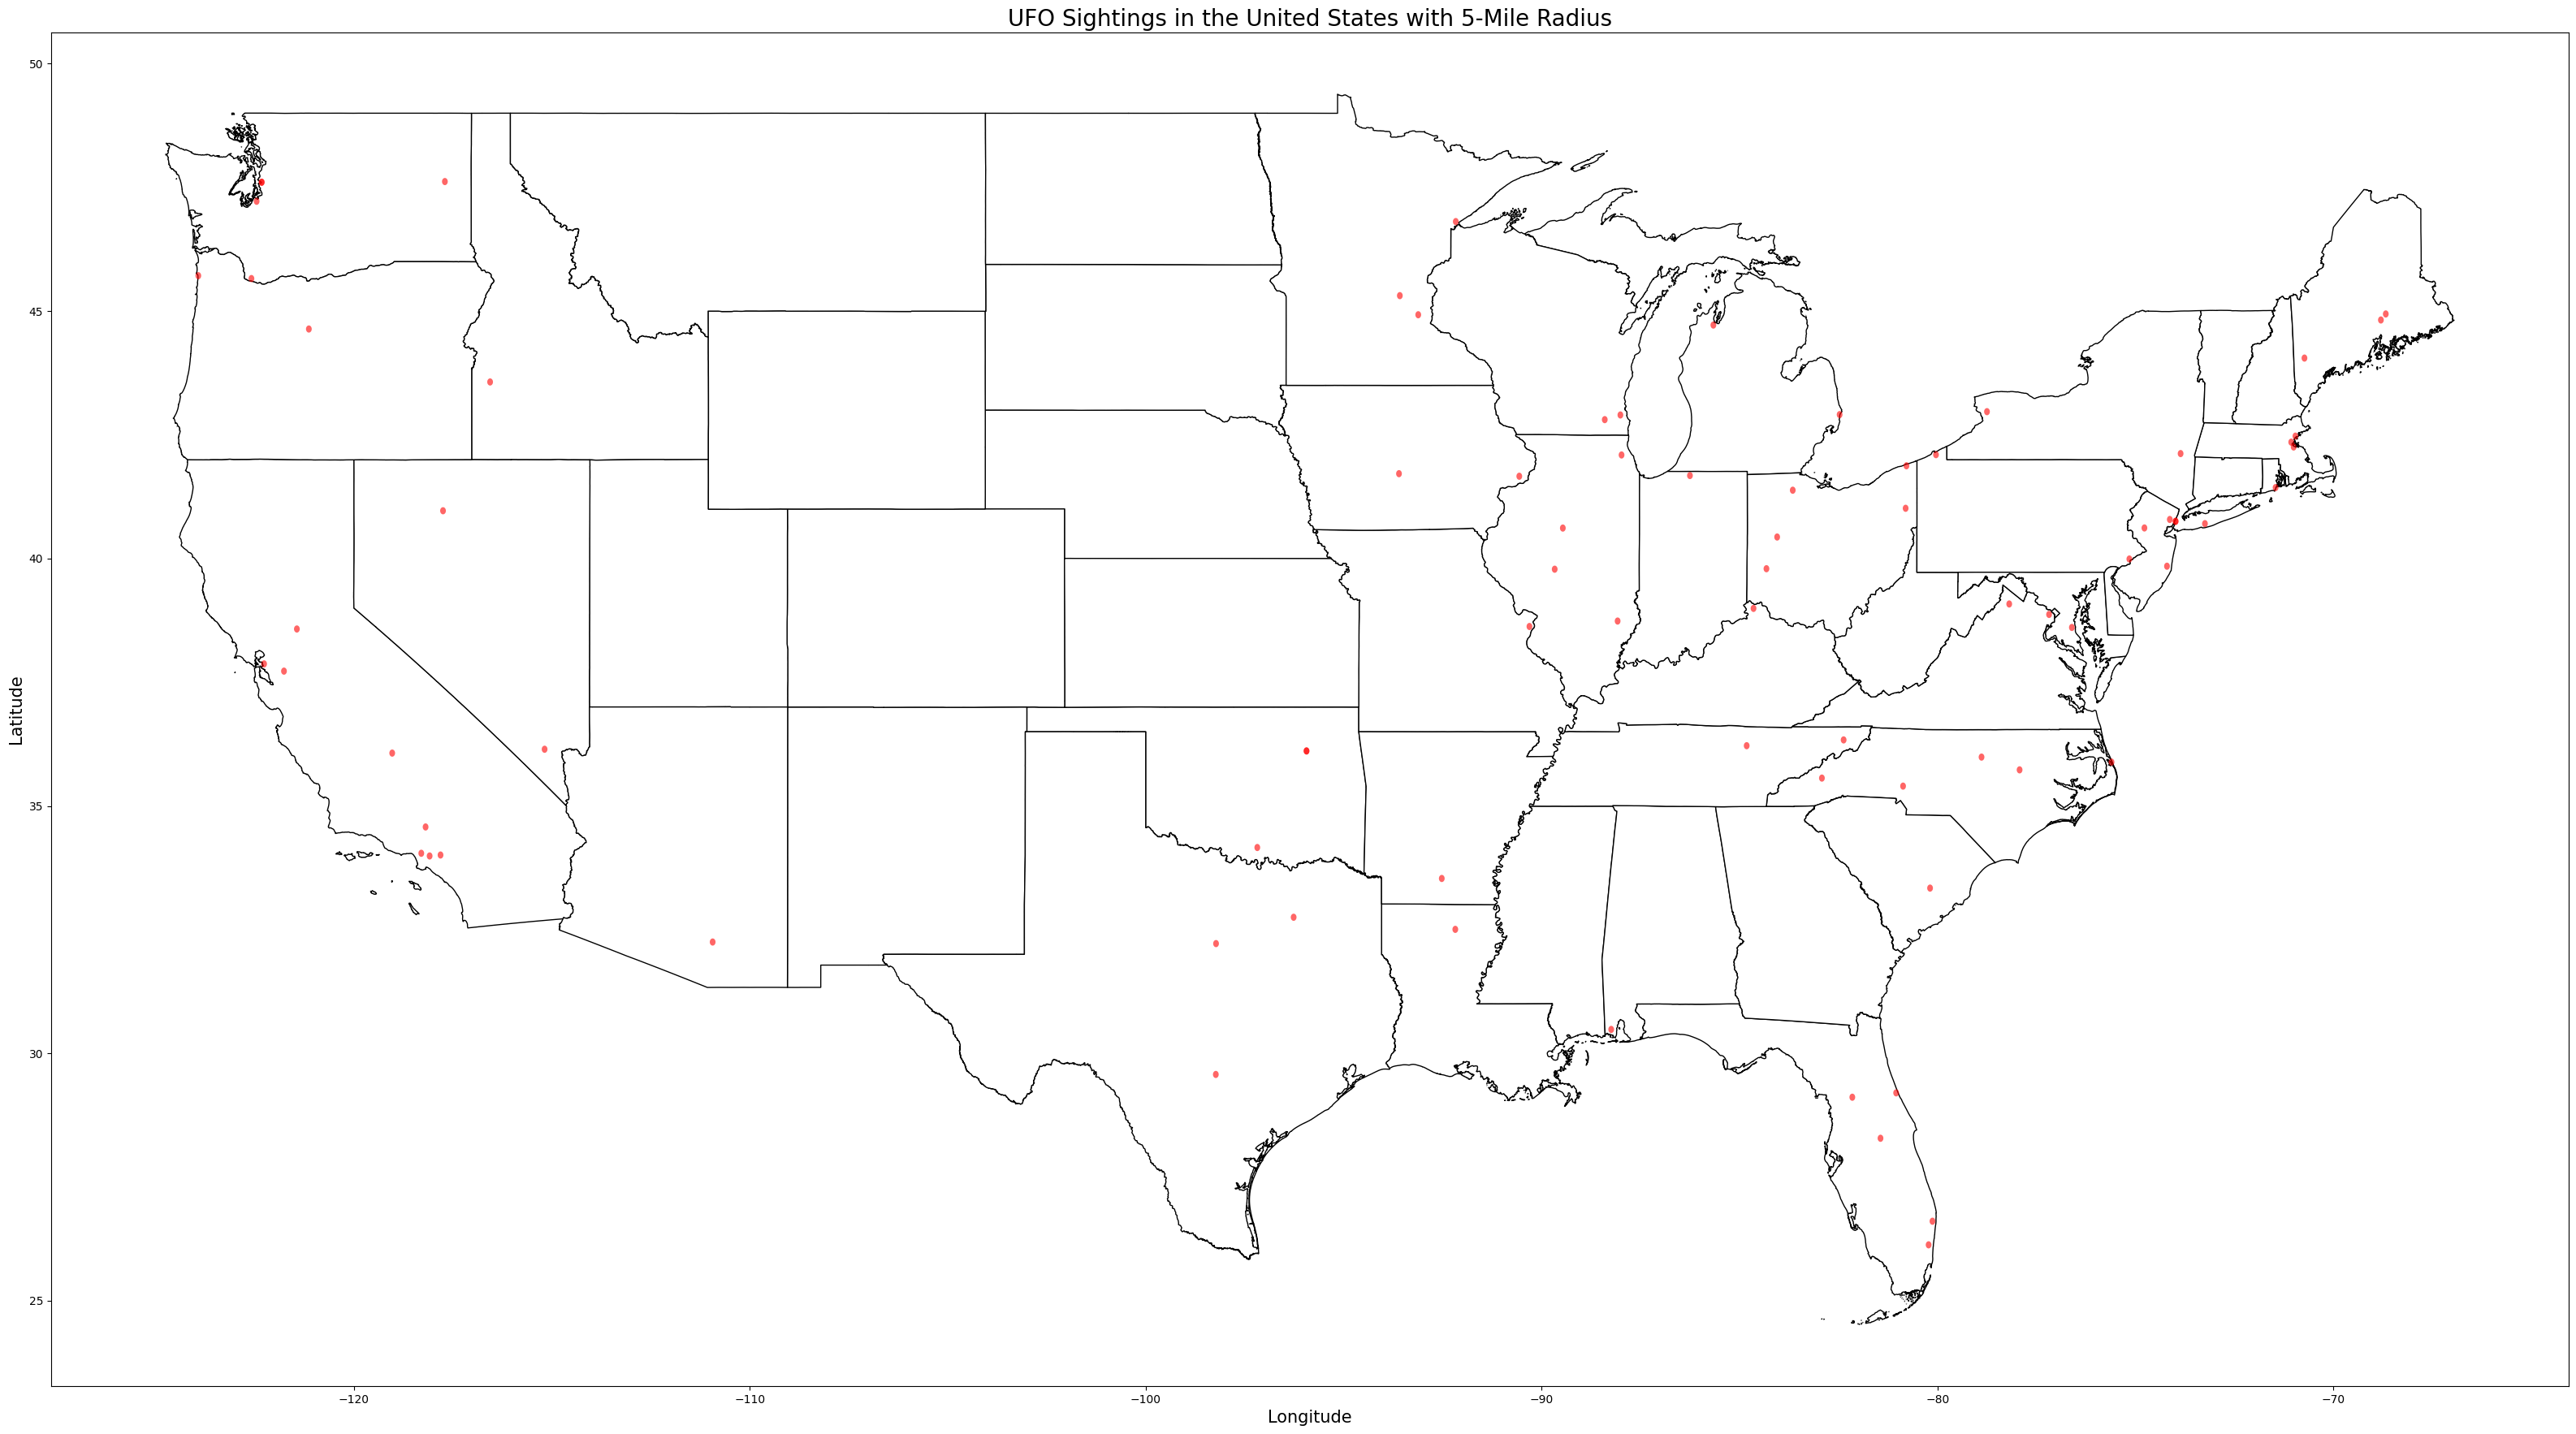

In [56]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load data
data_path = "test_weather.csv"
shape_path = "Shapefiles/cb_2018_us_state_500k.shp"

df = pd.read_csv(data_path)
shape = gpd.read_file(shape_path)

# Exclude the values that we would not like to display
shape = shape[~shape['STUSPS'].isin(['HI', 'AK', 'PR', 'AS', 'VI', 'MP', 'GU'])]

# Create GeoDataFrame from UFO sightings data
geometry = [Point(xy) for xy in zip(df['city_longitude'], df['city_latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Ensure CRS (Coordinate Reference System) is set correctly
geo_df.set_crs(epsg=4326, inplace=True)
shape.to_crs(geo_df.crs, inplace=True)  # Reproject shape to match geo_df CRS

# Perform spatial overlay to keep only points within US borders
points_within_us = gpd.overlay(geo_df, shape, how='intersection')

# Convert buffer distance from miles to degrees (approximate)
# This is a rough approximation. For more accurate distance-based buffering, you should project to a suitable CRS.
# 1 mile ≈ 0.0145 degrees
buffer_distance = 5 * 0.0145

# Create a buffer (circle) around each point
points_within_us['geometry'] = points_within_us.buffer(buffer_distance)

# Plot the data
fig, ax = plt.subplots(figsize=(40, 40))
shape.plot(ax=ax, color='white', edgecolor='black')
points_within_us.plot(ax=ax, color='red', alpha=0.6)

# Add titles and labels
ax.set_title('UFO Sightings in the United States with 5-Mile Radius', fontsize=20)
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)

# Show plot
plt.show()


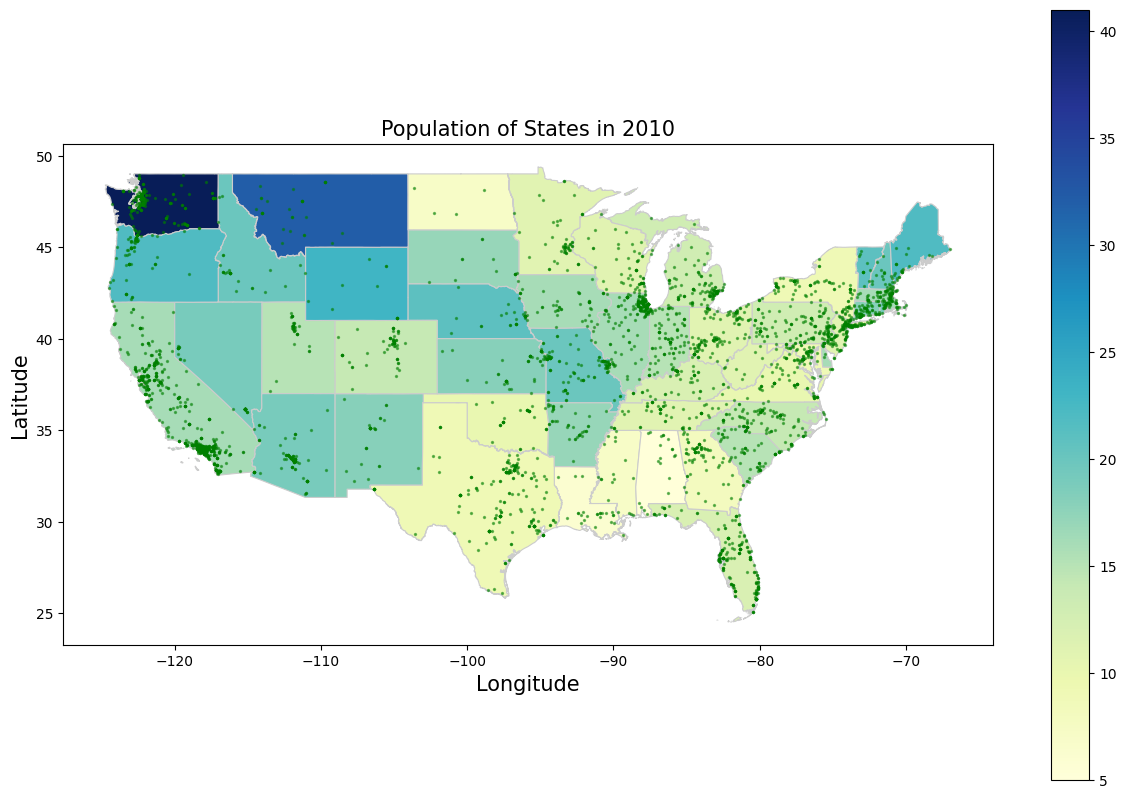

In [50]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# File paths
shapefile_path = "Shapefiles/cb_2018_us_state_500k.shp"
population_data_path = "../data/population/SCALEDsightings2009-2022.csv"
ufo_data_path = "yearly_coordinates/sightings_coordinates_2010.csv"

# Load shapefile
shape = gpd.read_file(shapefile_path)

# Exclude values we don't want to display
shape = shape[~shape['STUSPS'].isin(['HI', 'AK', 'PR', 'AS', 'VI', 'MP', 'GU'])]

# Read population data from CSV
population_df = pd.read_csv(population_data_path)

# Merge population data with shapefile
merged_data = shape.merge(population_df, left_on='NAME', right_on='NAME', how='left')

# Plot the map with population data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='2010', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and labels for population map
ax.set_title('Population of States in 2010', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)

# Load UFO sightings data
df = pd.read_csv(ufo_data_path)

# Create GeoDataFrame from UFO sightings data
geometry = [Point(xy) for xy in zip(df['city_longitude'], df['city_latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Ensure CRS (Coordinate Reference System) is set correctly
geo_df.set_crs(epsg=4326, inplace=True)
shape.to_crs(geo_df.crs, inplace=True) 

# Perform spatial overlay to keep only points within US borders
points_within_us = gpd.overlay(geo_df, shape, how='intersection')

# Plot UFO sightings on top of population map
points_within_us.plot(ax=ax, color='green', markersize=2, alpha=0.5)

# Show plot
plt.show()


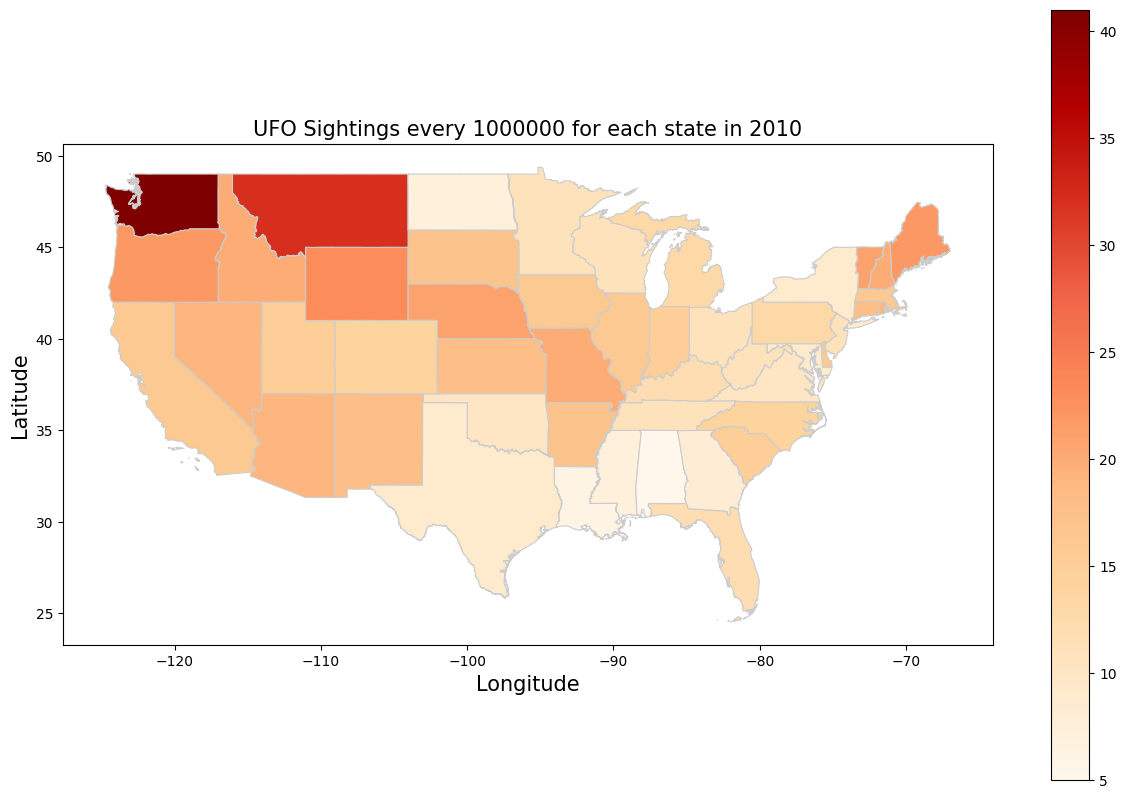

In [37]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt



# Load shapefile
shapefile_path = "Shapefiles/cb_2018_us_state_500k.shp"
population_data = "../data/population/SCALEDsightings2009-2022.csv"

shape = gpd.read_file(shapefile_path)
population_df = pd.read_csv(population_data)

shape = shape[~shape['STUSPS'].isin(['HI', 'AK', 'PR', 'AS', 'VI', 'MP', 'GU'])]


# Merge population data with shapefile
merged_data = shape.merge(population_df, left_on='NAME', right_on='NAME', how='left')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='2010', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and labels
ax.set_title('UFO Sightings every 1000000 for each state in 2010', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)

# Show plot
plt.show()


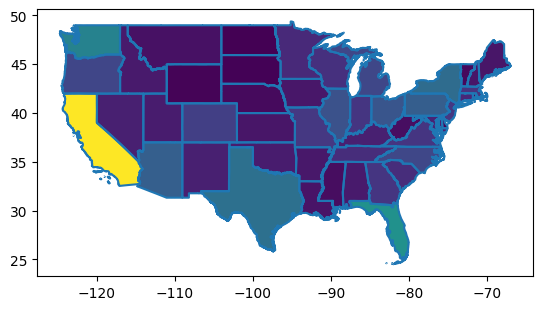

In [5]:
#Merging both files
shape = pd.merge(
    left=shape,
    right=df,
    left_on='NAME',
    right_on='state',
    how='left'
)

#Drops missing values
shape = shape.dropna()
shape = shape[~shape['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

ax = shape.boundary.plot()
shape.plot(ax=ax, column='count')
plt.show()

In [ ]:
fig = px.scatter_mapbox(df,
                        long = df['centroid_long'],
                        lat = df['centroid_lat'],
                        zoom = 3,
                        colour = df['state_counts'])